# Trajectory analysis using pCreode
Publication: https://doi.org/10.1016/j.cels.2017.10.012 <br>
Tutorial: https://github.com/KenLauLab/pCreode/blob/master/notebooks/pCreode_tutorial.ipynb

In [1]:
import scanpy as sc #import scanpy
import pandas as pd #pandas 
import numpy as np #import numpy
import pcreode #import pcreode
import matplotlib.pylab as plt #import matplotlib 
from sklearn.cluster import KMeans #import the KMeans algorithm from scikit-learn

In [2]:
sc.set_figure_params(dpi=80) #set figure display size

In [3]:
# Set paths
input_data = '/groups/umcg-wijmenga/tmp01/users/umcg-aramirezsanchez/umcg-nribeiro/NR03_scRNAseq/ongoing/outputs/subclustering/epithelia_v3.h5ad'
out_path = '/groups/umcg-wijmenga/tmp01/users/umcg-aramirezsanchez/umcg-nribeiro/NR03_scRNAseq/ongoing/outputs/trajectory_analysis/'

In [4]:
# Load the data - already normalized, with PCA and only with variable features
epithelia_adata = sc.read_h5ad(input_data)
epithelia_adata

AnnData object with n_obs × n_vars = 10730 × 2000
    obs: 'nCount_RNA', 'nFeature_RNA', 'nCount_SCT', 'nFeature_SCT', 'orig.ident', 'percent.mt', 'lane', 'SCT_snn_res.0.4', 'seurat_clusters', 'genotype', 'droplet', 'status', 'marsh', 'sex', 'age', 'batch', 'barcode', 'cell.type.1', 'cell.type.2', 'SCT_snn_res.0.7', 'SCT_snn_res.0.6', 'SCT_snn_res.0.65', 'SCT_snn_res.0.8', 'cell.type.3', 'cell.type.4'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

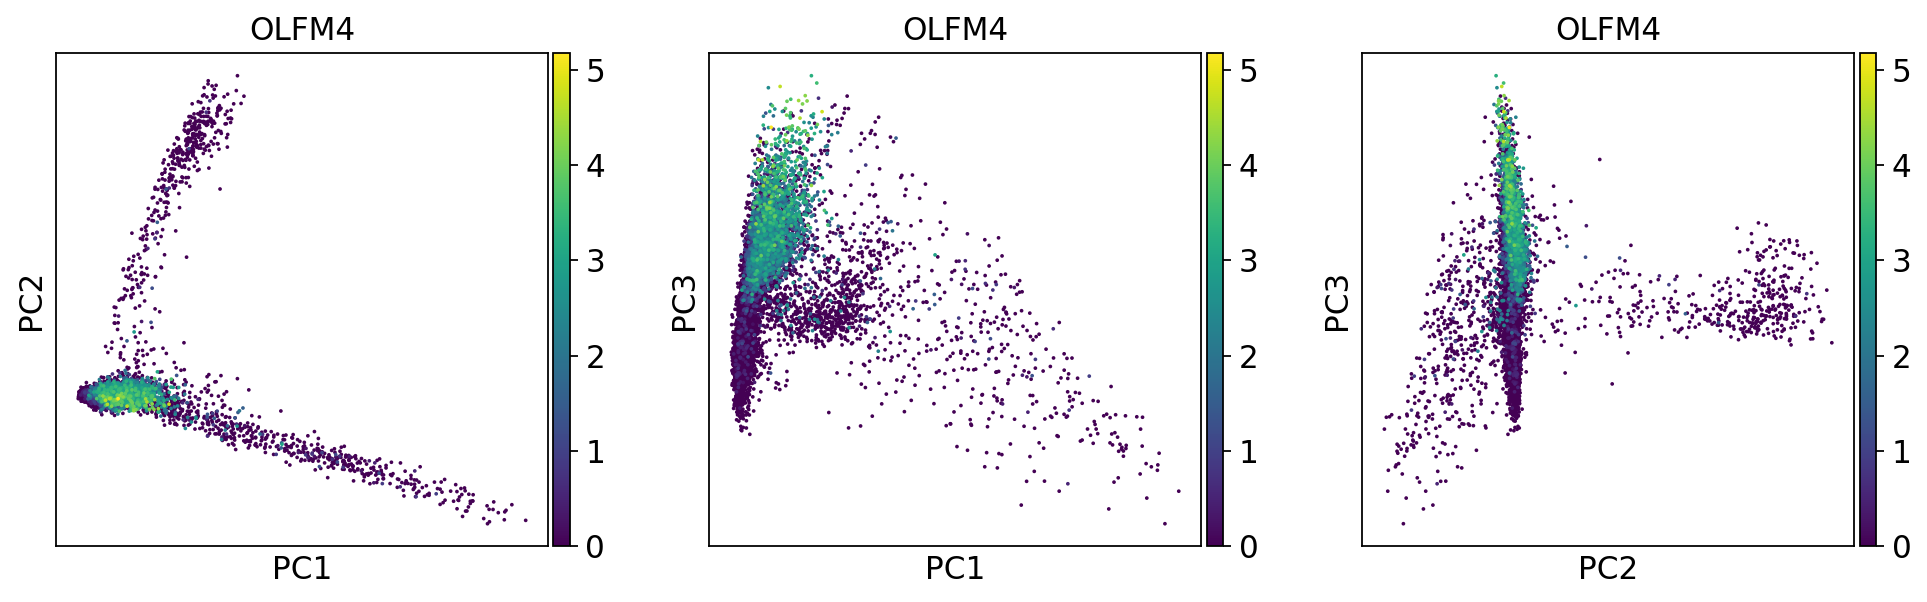

In [5]:
# Checking my PCs
sc.pl.pca(epithelia_adata, components=['1,2','1,3','2,3'], color = 'OLFM4') 

In [6]:
# Using all PCAs for my analysis
pca_data = epithelia_adata.obsm['X_pca']

In [7]:
# Density calculation
dens = pcreode.Density(pca_data)

best guess starting radius = 33.71687230234065


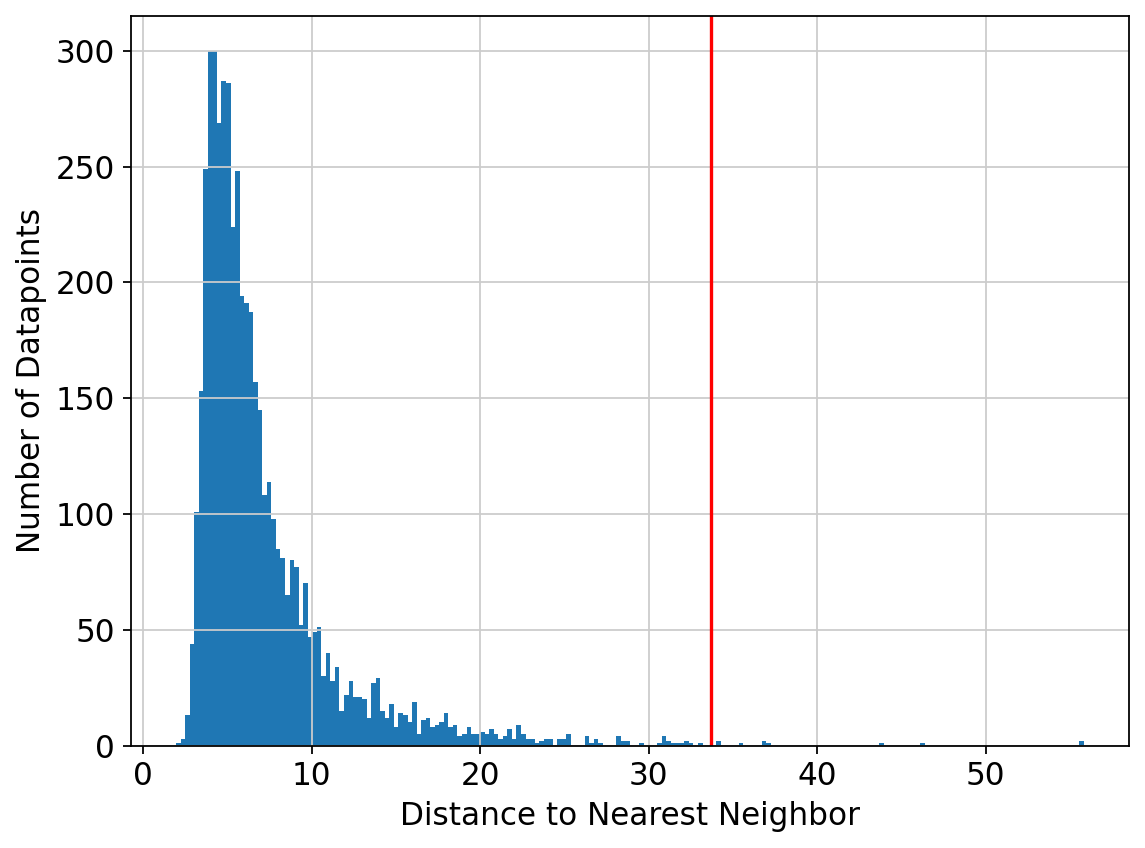

In [8]:
best_guess = dens.nearest_neighbor_hist()

calculating densities for datapoints: 0 -> 4999
calculating densities for datapoints: 5000 -> 9999
calculating densities for datapoints: 10000 -> 10729
****Always check density overlay for radius fit****


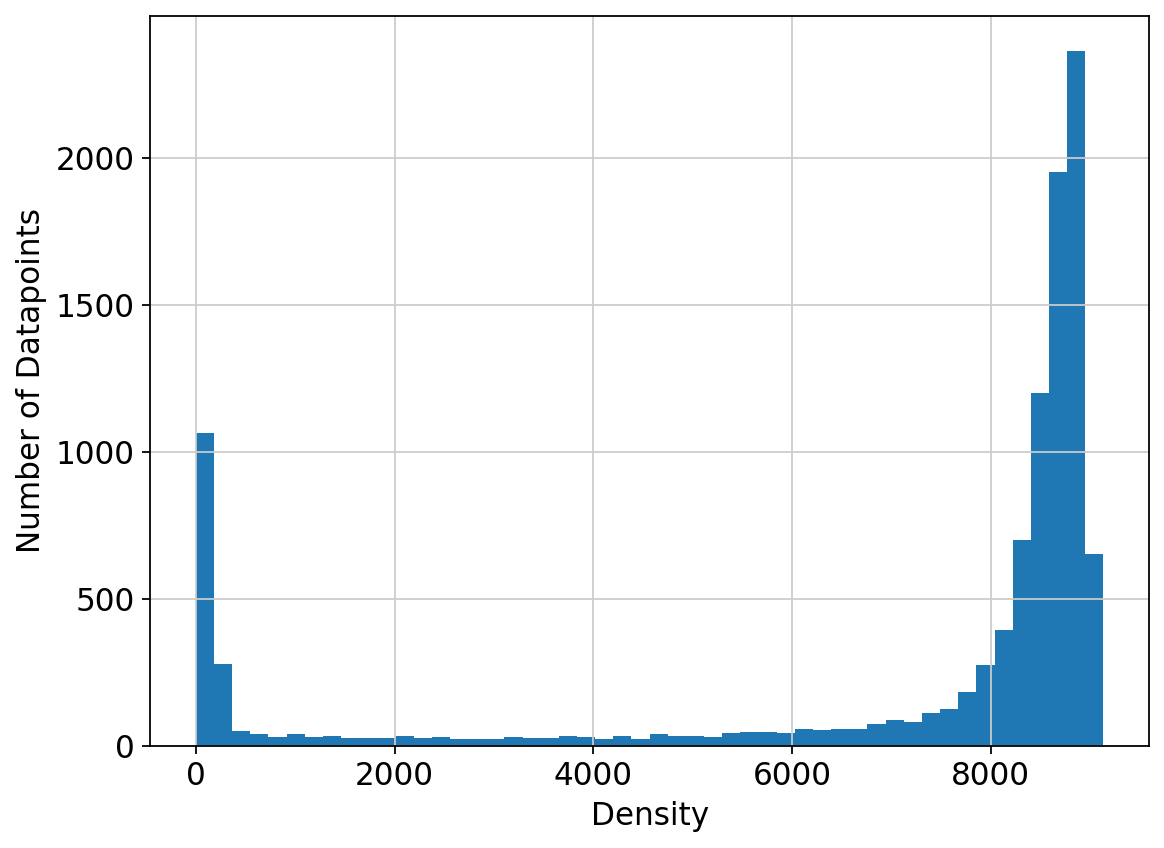

In [9]:
epithelia_adata.obs['Density'] = dens.get_density(radius = 25)
dens.density_hist( n_bins=50)

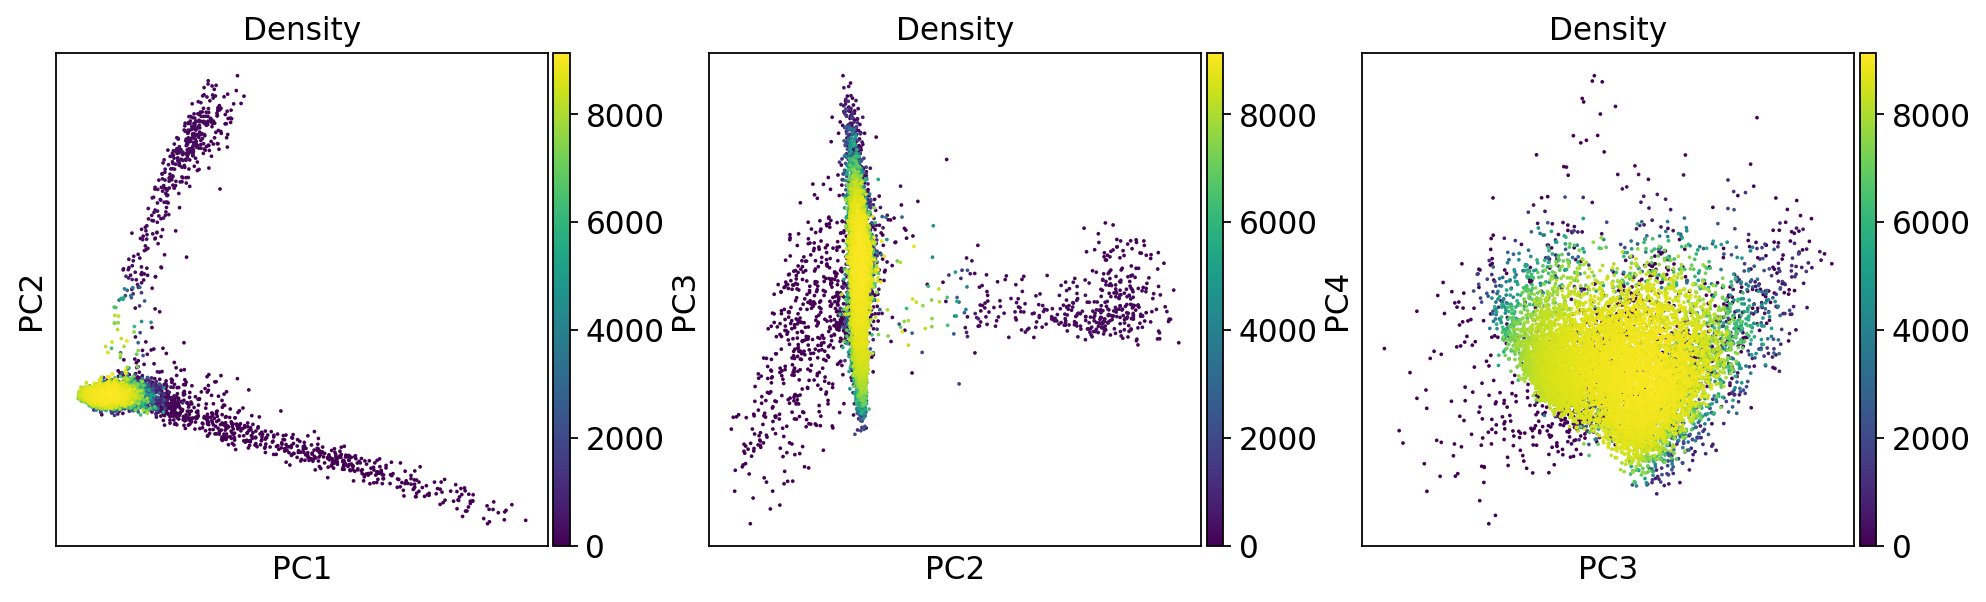

In [10]:
sc.pl.pca(epithelia_adata,components=['1,2','2,3', '3,4'],color = 'Density')  #overlay each cell's Density value onto a three principal components

In [11]:
# Setting down-sampling parameters
noise = 10 #noise cutoff based on density value
target = 18 #target downsampling proportion

In [12]:
downed, downed_ind = pcreode.Down_Sample( pca_data, epithelia_adata.obs['Density'], noise, target)

Number of data points in downsample = 5209


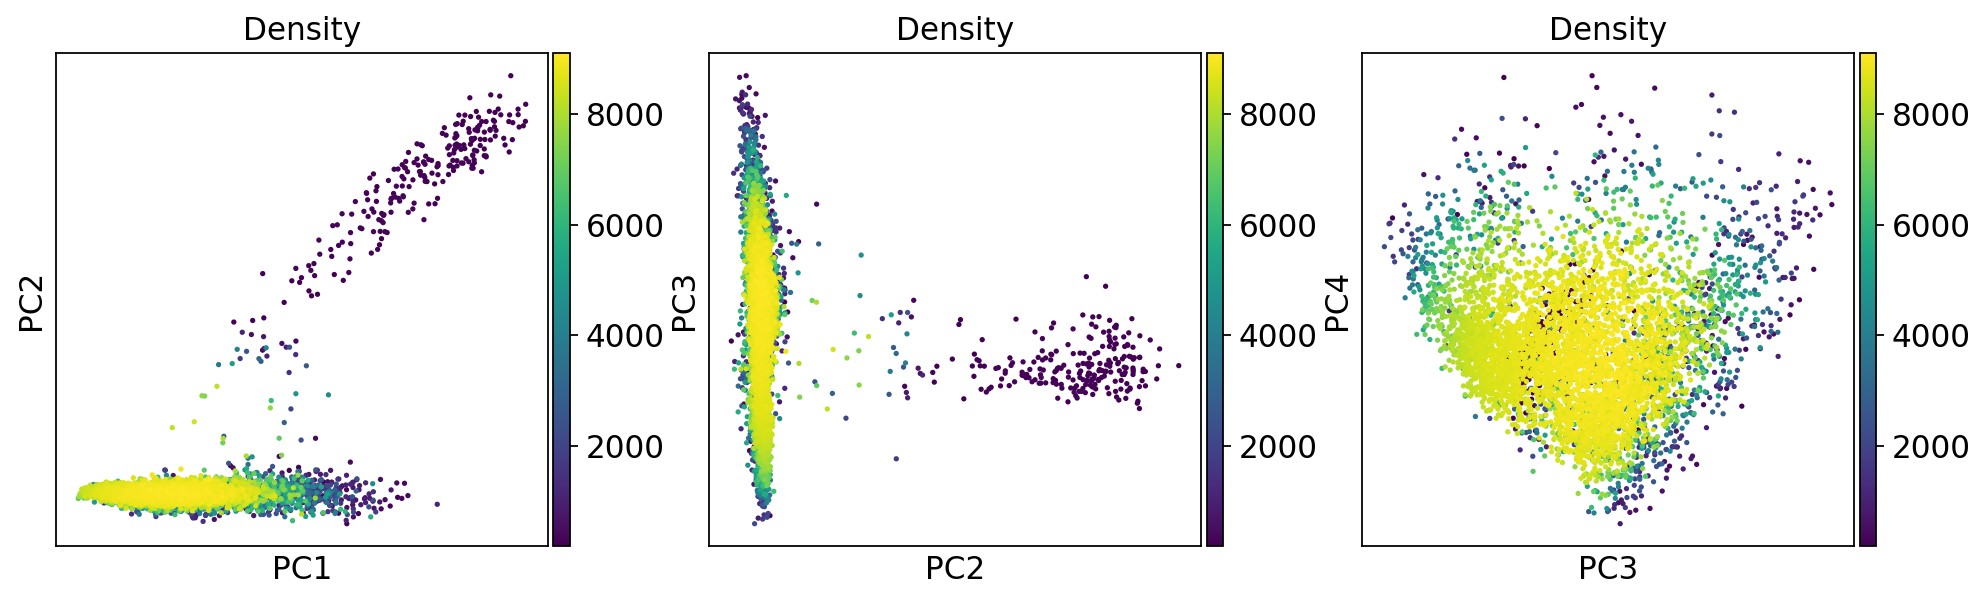

In [58]:
sc.pl.pca(epithelia_adata[downed_ind],components=['1,2','2,3', '3,4'],color = 'Density')  #density downsampled

In [13]:
# pCreode graphs
out_graph, out_ids = pcreode.pCreode( data=pca_data, density=np.array(epithelia_adata.obs['Density']), noise=noise, 
                                      target=target, file_path=out_path, num_runs=100)

Performing 100 independent runs, may take some time
Number of data points in downsample = 5256
Constructing density kNN
finding endstates
Number of endstates found -> 4
hierarchical placing
consensus aligning
saving files for run_num 1
Number of data points in downsample = 5225
Constructing density kNN
finding endstates
Number of endstates found -> 4
hierarchical placing
consensus aligning
saving files for run_num 2
Number of data points in downsample = 5246
Constructing density kNN
finding endstates
Number of endstates found -> 4
hierarchical placing
consensus aligning
saving files for run_num 3
Number of data points in downsample = 5282
Constructing density kNN
finding endstates
Number of endstates found -> 4
hierarchical placing
consensus aligning
saving files for run_num 4
Number of data points in downsample = 5237
Constructing density kNN
finding endstates
Number of endstates found -> 4
hierarchical placing
consensus aligning
saving files for run_num 5
Number of data points in dow

In [14]:
graph_ranks = pcreode.pCreode_Scoring( data=pca_data, file_path=out_path, num_graphs=100)

scoring graph 1
scoring graph 2
scoring graph 3
scoring graph 4
scoring graph 5
scoring graph 6
scoring graph 7
scoring graph 8
scoring graph 9
scoring graph 10
scoring graph 11
scoring graph 12
scoring graph 13
scoring graph 14
scoring graph 15
scoring graph 16
scoring graph 17
scoring graph 18
scoring graph 19
scoring graph 20
scoring graph 21
scoring graph 22
scoring graph 23
scoring graph 24
scoring graph 25
scoring graph 26
scoring graph 27
scoring graph 28
scoring graph 29
scoring graph 30
scoring graph 31
scoring graph 32
scoring graph 33
scoring graph 34
scoring graph 35
scoring graph 36
scoring graph 37
scoring graph 38
scoring graph 39
scoring graph 40
scoring graph 41
scoring graph 42
scoring graph 43
scoring graph 44
scoring graph 45
scoring graph 46
scoring graph 47
scoring graph 48
scoring graph 49
scoring graph 50
scoring graph 51
scoring graph 52
scoring graph 53
scoring graph 54
scoring graph 55
scoring graph 56
scoring graph 57
scoring graph 58
scoring graph 59
scorin

In [15]:
gid = graph_ranks[0] # this will select the first graph ID in the ranking from above
print(gid)

96


In [16]:
analysis = pcreode.Analysis( file_path=out_path, graph_id=gid, data=pca_data, density=np.array(epithelia_adata.obs['Density']), noise=noise)

In [17]:
seed=123456789

In [21]:
epithelia_adata.obs_vector('APOA1')

array([-0.62965928, -0.62965928, -0.62965928, ..., -0.62965928,
       -0.62965928, -0.62965928])

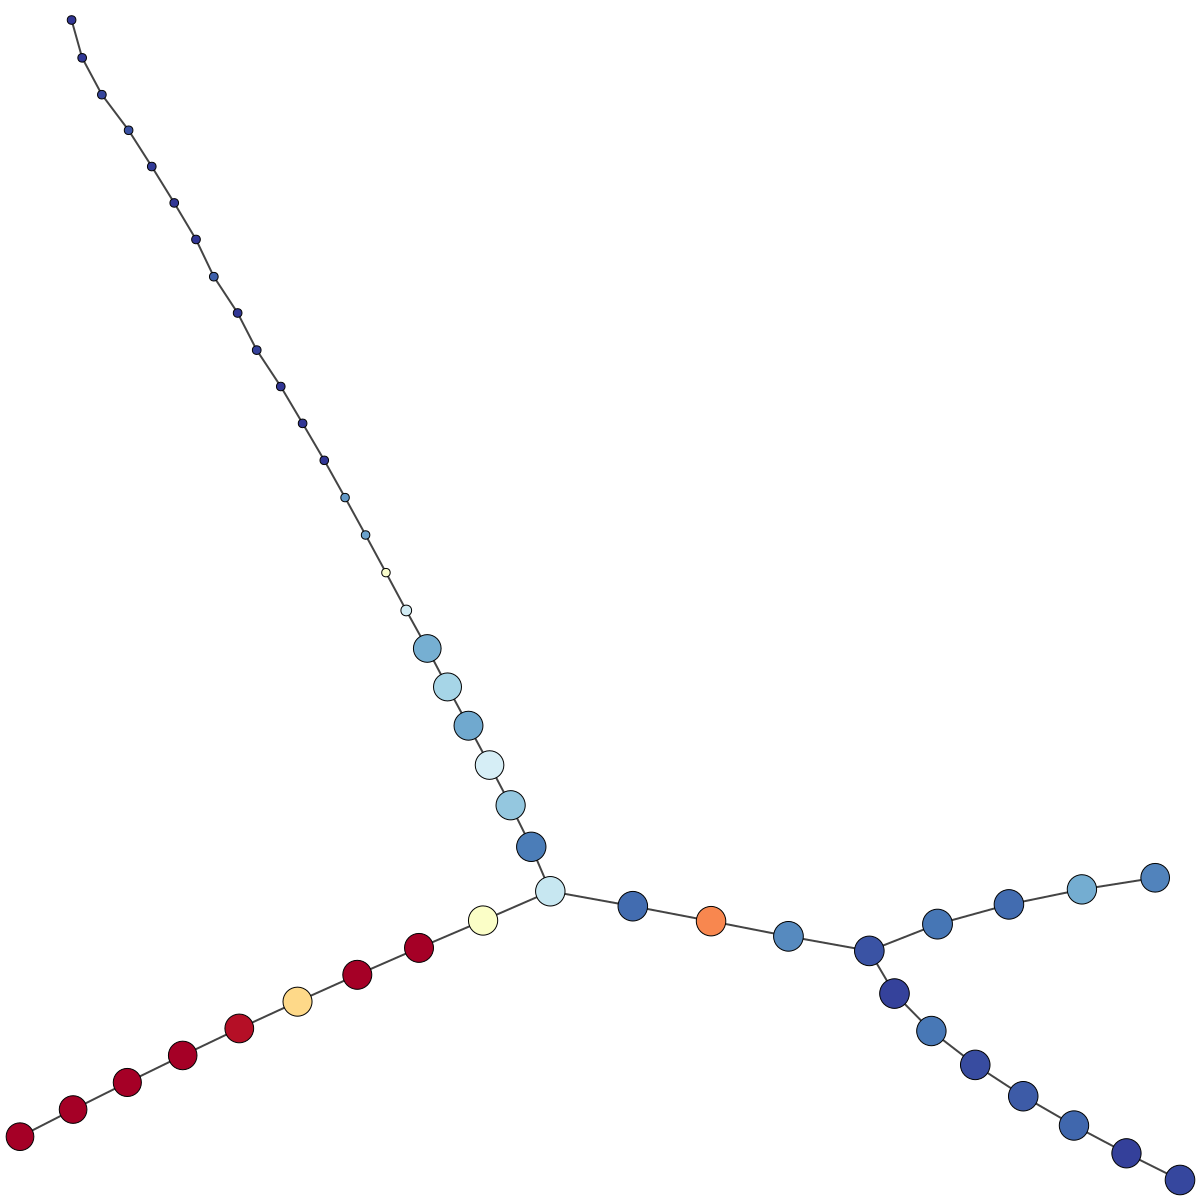

In [23]:
analysis.plot_save_graph( seed=seed, overlay=pd.Series(epithelia_adata.obs_vector('APOA1')), file_out='OLFM4', upper_range=3)